##### 함수 (def)이어서 

In [187]:
def asdf(G):
    return G + 10 * 2

x = 10

print(asdf(x))

30


- 함수 이름 func1
- 입력 숫자 2개 
- 반환값 x/y의 나머지와 x-y를 비교해 전자가 크면 Type 1 아니면 Type 2

In [188]:
def func1(x,y):
    if x%y > x-y:
        return 'Type 1' # 저번시간에 배운 return을 하면 종료되는 것을 이용한 if문 대체
    return 'Type 2'

result = func1(1,3)
print(result)

Type 1


In [189]:
inputa = 6
def factor(a):
    result_list = []
    for i in range(2,a+1,2):
        sum = 1
        for j in range(1,i+1):
            sum *= j
        result_list.append(sum)
    return result_list

result = factor(inputa)
print(' '.join(list(map(str,result))))

2 24 720


- 함수를 사용하면 코드를 상당히 단순하게 만들 수 있다.
```python
for i in range(5):
    print('hello')
    print(i)
    print('hello')
```
- 다음과 같은 코드가 있다 라고 하면 다음과 같이 단순하게 변경할 수 있다.ㅣ

In [190]:
def func2(i):
    print('hello')
    print(i)
    print('hello')

for i in range(5):
    func2(i)

hello
0
hello
hello
1
hello
hello
2
hello
hello
3
hello
hello
4
hello


In [191]:
list1 = []
for i in range(5):
    list1.append(i)
print(list1)

list1 = [i for i in range(5)] # 리스트 컴프리헨션 
print(list1)

list2 = []
for i in range(5):
    if i % 2 == 0:
        list2.append(i)

print(list2)

list2 = [i for i in range(5) if i % 2 == 0]
print(list2)

#list2 = [i for i in range(5) if i % 2 == 0 else 'X'] # error 코드임
#print(list2)

list2 = [i if i % 2 == 0 else 'X' for i in range(5)]
print(list2)

[0, 1, 2, 3, 4]
[0, 1, 2, 3, 4]
[0, 2, 4]
[0, 2, 4]
[0, 'X', 2, 'X', 4]


- 리스트 컴프리헨션을 사용하는 이유는 간략하게 만들어주고, 속도도 풀어서 쓴 것 보다 빠르기 때문이다.
- 코드가 보기 난해해질 수 있다. 또한 else까지 고려하게 된다면 if문을 for보다 앞에 작성해야한다. 뒤에 작성하게 되면 오류가 발생한다.

In [192]:
def func3(a):
    #result = []
    if a % 2 == 0:
        return a
    else:
        return 'X'

    

list2 = [func3(i) for i in range(5)]
print(list2)

list2 = list(map(lambda x:func3(x),range(5)))
print(list2)

[0, 'X', 2, 'X', 4]
[0, 'X', 2, 'X', 4]


##### apply() 함수
- 판다스에서 자주 사용함

In [193]:
import pandas as pd

df1 = pd.DataFrame([[1,2,3,4,5,6],[4,5,6,7,8,9],[7,4,1,5,8,5]])
print(df1)
# df1[2]에 해당하는 것을 전부다 문자열로 바꾼다고 한다면..
for i in df1[2]:
    print('이 숫자는',i)

df1[2] = df1[2].apply(lambda x:'이 숫자는 {}'.format(x) ) #df1[2]에 있는 값 하나하나를 x로 간주함
print(df1)

df1[3] = df1[3].apply(lambda x:'이 숫자는 짝수입니다. {}'.format(x) if x % 2 == 0 else '이 숫자는 홀수입니다. {}'.format(x)) #df1[2]에 있는 값 하나하나를 x로 간주함
print(df1)

   0  1  2  3  4  5
0  1  2  3  4  5  6
1  4  5  6  7  8  9
2  7  4  1  5  8  5
이 숫자는 3
이 숫자는 6
이 숫자는 1
   0  1        2  3  4  5
0  1  2  이 숫자는 3  4  5  6
1  4  5  이 숫자는 6  7  8  9
2  7  4  이 숫자는 1  5  8  5
   0  1        2               3  4  5
0  1  2  이 숫자는 3  이 숫자는 짝수입니다. 4  5  6
1  4  5  이 숫자는 6  이 숫자는 홀수입니다. 7  8  9
2  7  4  이 숫자는 1  이 숫자는 홀수입니다. 5  8  5


In [194]:
def func4(a):
    if a % 2 == 0:
        return '짝수'
    return '홀수'
print(df1)
df1[4] = df1[4].apply(lambda x:func4(x)) #function을 사용하니까 훨씬 깔끔해진 것을 볼 수 있다.
print(df1)

   0  1        2               3  4  5
0  1  2  이 숫자는 3  이 숫자는 짝수입니다. 4  5  6
1  4  5  이 숫자는 6  이 숫자는 홀수입니다. 7  8  9
2  7  4  이 숫자는 1  이 숫자는 홀수입니다. 5  8  5
   0  1        2               3   4  5
0  1  2  이 숫자는 3  이 숫자는 짝수입니다. 4  홀수  6
1  4  5  이 숫자는 6  이 숫자는 홀수입니다. 7  짝수  9
2  7  4  이 숫자는 1  이 숫자는 홀수입니다. 5  짝수  5


##### lambda
- lambda에서 if를 쓰게 된다면 True일때 조건문 else 실행문 형식으로 작성된다.
```python
list2 = [i if i % 2 == 0 else 'X' for i in range(5)]
```
- 를 보면 True일때 i else일때 'X' 그리고 i의 범위를 준다.

In [195]:
result = (lambda x,y:x+y)(10,20)
print(result,type(result))

result = (lambda x,y,z:x+y+z)(10,20,30)
print(result,type(result))

30 <class 'int'>
60 <class 'int'>


##### 패키지 만들어보기
- 패키지 : 어떤 함수의 집합
- 같은 파일 내 여러 함수를 모아서 다른 파일로 저장한다.
- 이런식으로 자주사용하는 코드를 모아놓을 수 있고, 또한 많은 사람들에게 공유함으로서 유지보수 에러 수정 등 기여를 받을 수 있다

In [196]:
import hyunskki as hk
from hyunskki import hyun #어떤 패키지 안에 다른 이름의 파일을 불러온다
result = hk.function1()
print(result)

result = hyun.function2()
print(result)

Hello !
subfile !


##### 시각화
1. matplotlib
    + 파이썬의 대표적인 시각화 패키지
2. seaborn
    + matplotlib을 기반으로 작동하고 디자인요소와 통계차트를 추가함
3. plotly
    + 인터렉티브 플롯을 위한 패키지, 웹, jupyter 개발환경에서 데이터확인에 최적화

- 시각화 그래프는 디자인이 이쁜 코드 몇개만 확보해놓고 들어가는 데이터만 맞춰주는 식으로 진행한다.
- 그래프를 그린다 라는 상황은 보고서나 발표 등의 누군가를 설득해야되는 상황일 가능성이 높다.
- 직업 특성상 설명하는 대상이 코딩을 모를 가능성이 높다. 따라서 그래프들을 그려서 보여주는 것이 중요하다 (data scientist) 
- 막대그래프를 쓰는 이유 : A가 B대비 얼마나 많은가 한눈에 비교하기 편함
- 파이차트(pie chart)를 쓰는 이유 : 전체 대비 얼마인가 (점유율)을 보여줄 때 사용함


##### Matplotlib

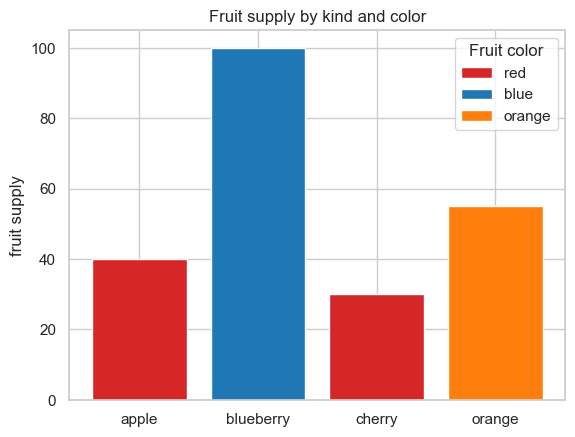

In [197]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

fruits = ['apple', 'blueberry', 'cherry', 'orange']
counts = [40, 100, 30, 55]
bar_labels = ['red', 'blue', '_red', 'orange']
bar_colors = ['tab:red', 'tab:blue', 'tab:red', 'tab:orange']

ax.bar(fruits, counts, label=bar_labels, color=bar_colors)

ax.set_ylabel('fruit supply')
ax.set_title('Fruit supply by kind and color')
ax.legend(title='Fruit color') #범례

plt.show()

- 막대그래프 사용시에 꼭 그룹별로 잘 묶어주는것이 중요하다.
- 글자 크기와 색상이 중요하다. 누군가에게 보여주는 것이기 때문이다. 단위도 적어주는게 좋다
- 동적그래프 : Client가 보고싶은것을 보여준다 (plotly)
- 정적그래프 : 개발자가 보여주고싶은것을 보여준다

##### EDA (Exploratory Data Analysis:탐색적 데이터 분석)
- 시각화를 하는 이유는 데이터가 어떤 특성을 가지고 있는지, 어떤 형태를 가지고 있는지 확인한 다음에 분석을 하기 위해서 실행한다.
- 데이터 특성을 모를 경우 EDA를 통해서 특성, 분포, 경향을 알아보는데 항상 시각화를 활용하는 경우가 많다.

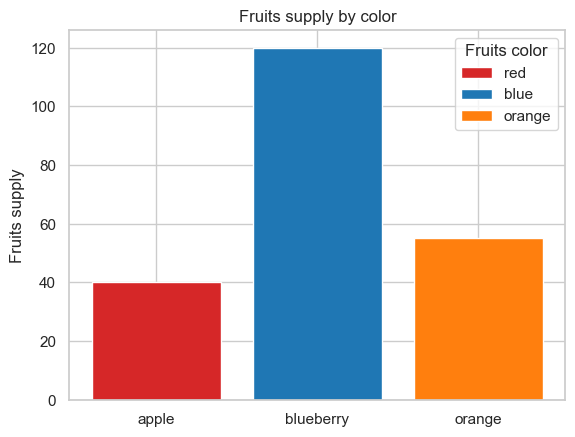

In [198]:
fig, ax = plt.subplots() #subplots 함수는 2개의 반환값을 준다. fig는 영역 ax는 축
fruits = ['apple','blueberry','orange']
counts = [40,120,55]
bar_labels = ['red','blue','orange']
bar_colors = ['tab:red','tab:blue','tab:orange']

ax.bar(fruits,counts,label=bar_labels,color=bar_colors) #그래프의 축 정보에다가 자료 입력
ax.set_ylabel('Fruits supply') #y축 제목 설정
ax.set_title('Fruits supply by color') #전체 제목 설정
ax.legend(title='Fruits color') #범례의 이름 설정
plt.show()

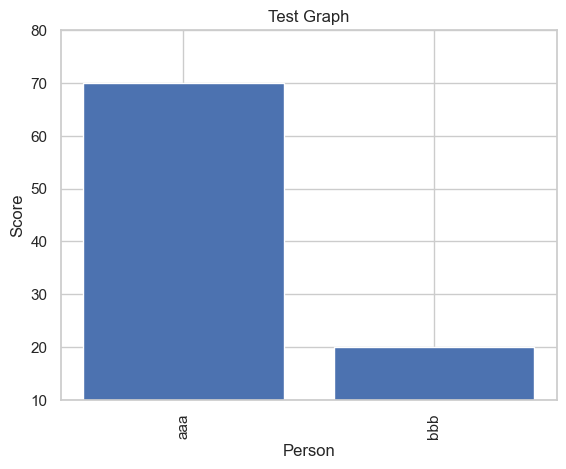

In [199]:
#막대 그래프를 그리기 위한 데이터 준비
x = ['A','B']
y = [70,20]
plt.bar(x,y) #x,y데이터로만 그래프 그림
plt.title('Test Graph') #제목 추가
plt.xlabel('Person') #x축 이름 추가
plt.ylabel('Score') #y축 이름 추가
plt.ylim(10,80) #y축 범위 설정
plt.xticks(['A','B'],['aaa','bbb'],rotation=90) #눈금정보 설정 및 추가 기능 , rotation은 이름을 회전시킴
plt.savefig('../testimage.pdf',bbox_inches='tight') #bbox_inches tight로 지정해주면 딱 맞게 그림 저장해줌
plt.show()


- 위와 같이 그래프를 만들고 변형하고 저장할 수 있다.
- plt.show()는 print와 동일하다. 따라서 show다음에 저장 코드를 작성하면 아무것도 없는 것이 저장된다.

1. plt.plot : 선 그래프
2. plt.scatter : 산점도
3. plt.hist : 도수분포표
4. plt.show() : 그래프 출력
5. plt.clf() : 그래프 삭제

In [200]:
#pop data를 사용하기
import hyunskki
from hyunskki import pop
print('pop x : ',pop.x)
print('pop y : ',pop.y)
print('pop year : ',pop.year)
print('pop pop : ',pop.pop)

pop x :  [40, 41, 13, 22, 41, 73, 91, 69, 65, 90, 67, 43, 32, 52, 49, 96, 12, 2, 81, 54, 8, 93, 41, 53, 80, 76, 8, 8, 24, 15, 81, 67, 75, 5, 32, 20, 40, 29, 78, 24, 82, 11, 42, 14, 64, 77, 0, 9, 10, 5, 57, 72, 95, 100, 22, 90, 34, 75, 44, 26, 67, 14, 97, 85, 19, 65, 58, 20, 67, 75, 91, 91, 60, 37, 5, 35, 67, 95, 94, 99, 15, 60, 24, 63, 12, 52, 28, 34, 58, 57, 77, 50, 85, 92, 86, 23, 8, 87, 50, 19]
pop y :  [15, 11, 53, 44, 86, 51, 82, 7, 38, 27, 73, 89, 9, 28, 66, 33, 97, 0, 75, 40, 79, 81, 9, 2, 46, 88, 17, 44, 28, 21, 16, 27, 86, 99, 19, 12, 100, 92, 60, 38, 77, 76, 73, 65, 20, 13, 71, 76, 1, 51, 5, 21, 32, 54, 11, 4, 57, 95, 17, 27, 39, 74, 28, 61, 71, 6, 47, 53, 34, 54, 52, 92, 96, 12, 7, 14, 55, 45, 4, 24, 86, 17, 46, 1, 93, 76, 87, 18, 8, 25, 89, 15, 71, 44, 52, 48, 6, 2, 32, 43]
pop year :  [1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981

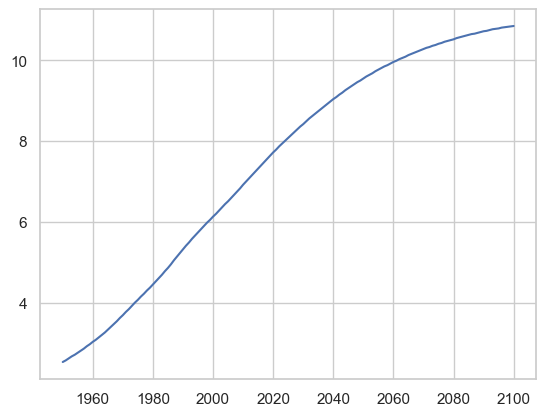

In [201]:
plt.plot(pop.year,pop.pop)
plt.show()

- 산점도는 각 데이터 포인트들의 분포를 직관적으로 확인할 수 있다. 
- x와 y 간의 영향을 확인할 수 있다.

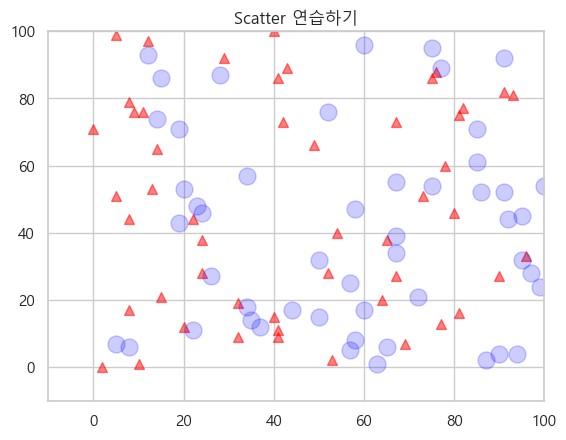

In [202]:
import matplotlib
plt.rc('font', family='Malgun Gothic') #윈도우에서 한글 사용할 수 있게 해줌
matplotlib.rcParams['axes.unicode_minus'] = False #마이너스 기호 오류 해결하기 (유니코드의 -기호를 사용하지 않겠다.)
plt.scatter(pop.x[:50],pop.y[:50],s=50,alpha=0.5,marker='^',color='red')
plt.scatter(pop.x[50:],pop.y[50:],s=150,alpha=0.2,marker='o',color='blue')
plt.ylim(-10,100)
plt.xlim(-10,100)
plt.grid(True)
plt.title('Scatter 연습하기')
#alpha = 투명도, s = size
#marker = 모양, color = 색깔
plt.show()

- 히스토그램은 해당 데이터의 빈도를 확인할 수 있다
- 데이터의 분포를 확인할 수 있다.

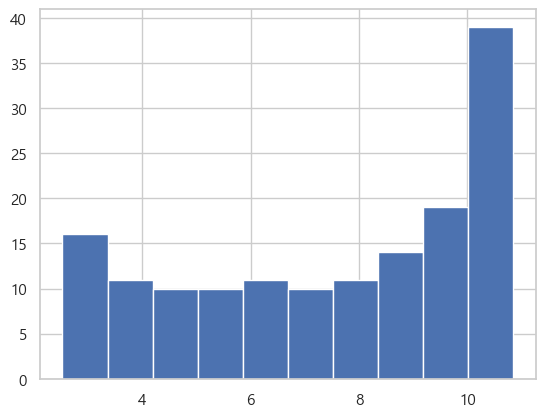

In [203]:
plt.hist(pop.pop)
plt.show()

##### Seaborn
- 통계 관련 차트를 그리기에 적합하다.

    species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0    Adelie  Torgersen            39.1           18.7              181.0   
1    Adelie  Torgersen            39.5           17.4              186.0   
2    Adelie  Torgersen            40.3           18.0              195.0   
3    Adelie  Torgersen             NaN            NaN                NaN   
4    Adelie  Torgersen            36.7           19.3              193.0   
..      ...        ...             ...            ...                ...   
339  Gentoo     Biscoe             NaN            NaN                NaN   
340  Gentoo     Biscoe            46.8           14.3              215.0   
341  Gentoo     Biscoe            50.4           15.7              222.0   
342  Gentoo     Biscoe            45.2           14.8              212.0   
343  Gentoo     Biscoe            49.9           16.1              213.0   

     body_mass_g     sex  
0         3750.0    Male  
1         3800.0  Female  
2     

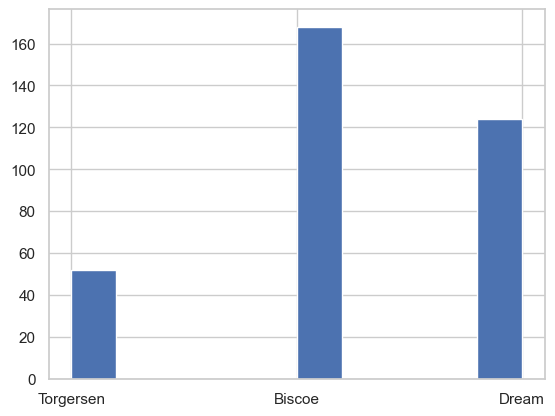

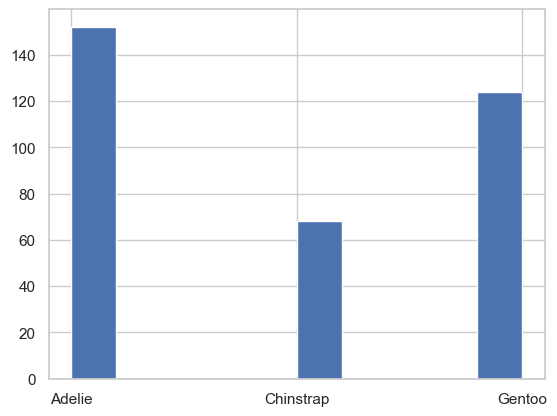

In [204]:
import seaborn as sns
sns.set_theme(style="whitegrid") #seaborn의 테마를 설정 배경 화이트, 격자 grid

penguins = sns.load_dataset("penguins")
print(penguins)
plt.hist(penguins["island"])
plt.show()
plt.hist(penguins['species'])
plt.show()


c:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


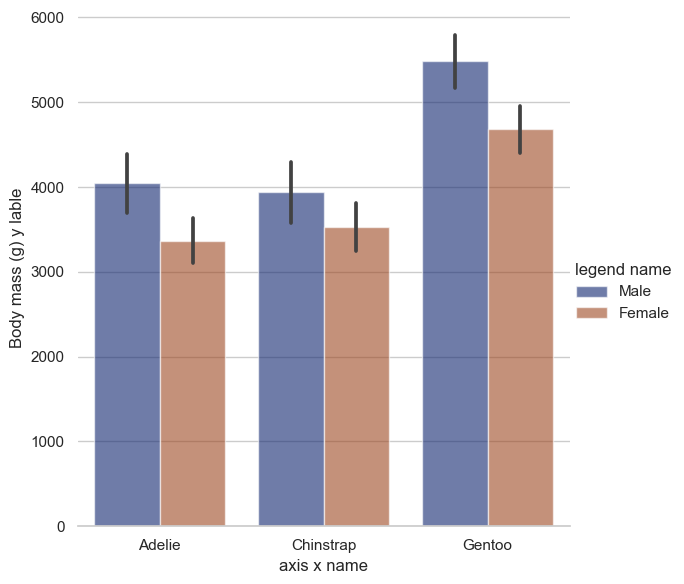

In [205]:

# Draw a nested barplot by species and sex
g = sns.catplot(
    data=penguins, kind="bar",
    x="species", y="body_mass_g", hue="sex",
    errorbar="sd", palette="dark", alpha=.6, height=6 #errorbat는 캔들 바를 의미한다.
)
g.despine(left=True)
g.set_axis_labels("axis x name", "Body mass (g) y lable")
g.legend.set_title("legend name")

<Axes: xlabel='species', ylabel='body_mass_g'>

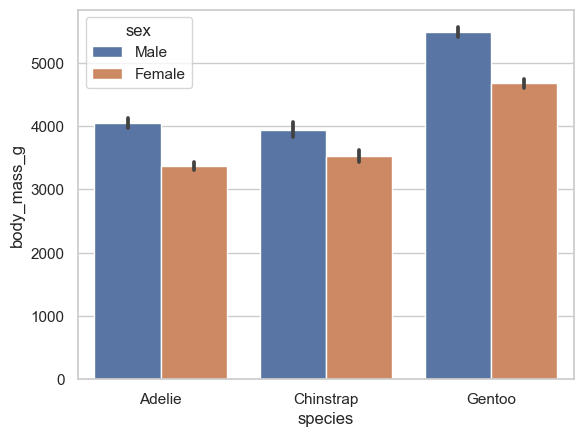

In [206]:
sns.barplot(penguins,x="species",y="body_mass_g",hue='sex')


<Axes: xlabel='species', ylabel='body_mass_g'>

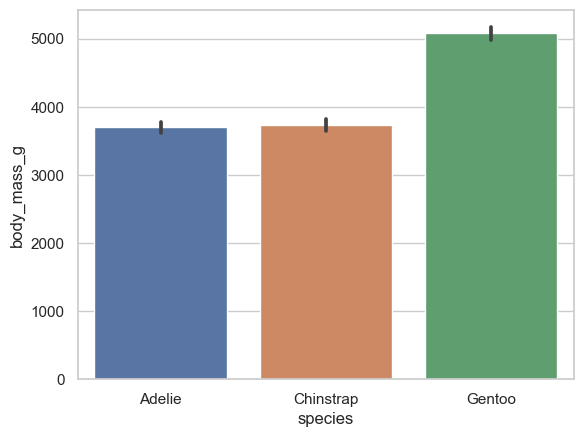

In [207]:
sns.barplot(penguins,x="species",y="body_mass_g")

- 중간값(median)과 평균(mean)의 차이는 평균은 흔히 생각하는 산술평균이고 중간값은 가장 큰것과 가장 작은 것을 순차적으로 제거해가면서 중간에 있는 값을 찾아내는 것이다. 짝수라면 남은 2개의 평균을 중간값으로 사용한다.
- 평균은 이상치로 인해서 데이터가 오염될 가능성이 높기 때문에 중간값을 사용하는 경우도 있다.
- boxplot은 중간값을 통해서 보여준다.
- boxenplot과 바이올린 플롯까지 가기 싫으면 아래와 같이 박스플롯과 strip플롯을 통해 분포와 밀도를 표현할 수 있다.
- 파이썬의 그래프 그리는 패키지들은 겹쳐서 그릴수 있고 자동으로 어느정도 해준다.

<Axes: xlabel='species', ylabel='body_mass_g'>

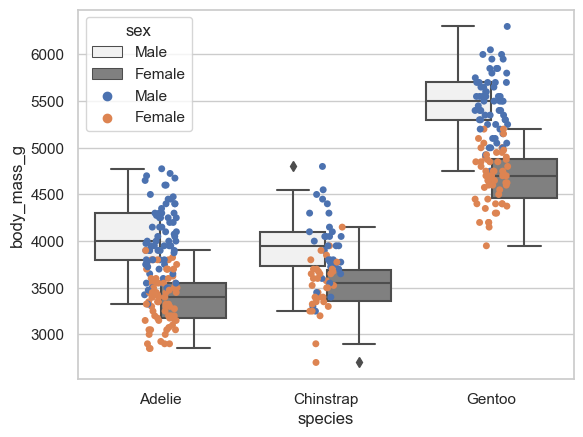

In [208]:
sns.boxplot(penguins,x="species",y="body_mass_g",hue='sex',color='gray')
sns.stripplot(penguins,x="species",y="body_mass_g",hue='sex')

- boxenplot을 사용하면 데이터의 분포 또한 관찰할 수 있어서 보기 편하다
- 바이올린플롯 또한 자주 사용된다.

<Axes: xlabel='species', ylabel='body_mass_g'>

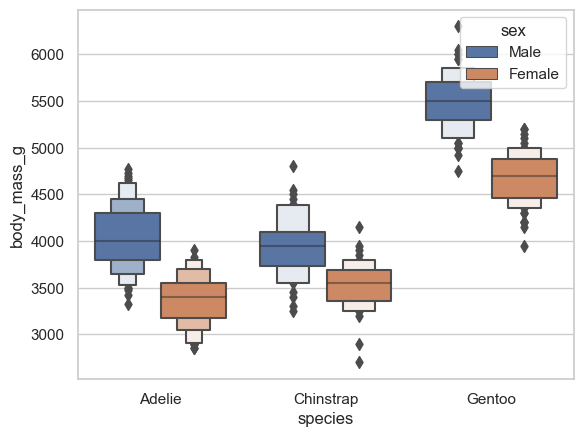

In [209]:
sns.boxenplot(penguins,x="species",y="body_mass_g",hue='sex')

<Axes: xlabel='species', ylabel='body_mass_g'>

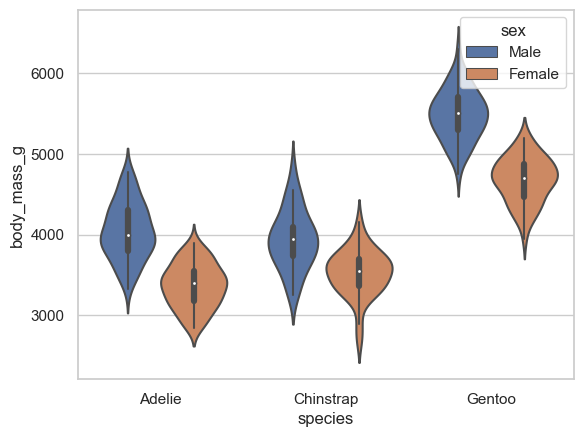

In [210]:
sns.violinplot(penguins,x="species",y="body_mass_g",hue='sex')

In [211]:
tips = sns.load_dataset('tips')
print(tips)

     total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]


##### 직접 sns를 사용해서 시각화해서 분석해보기

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


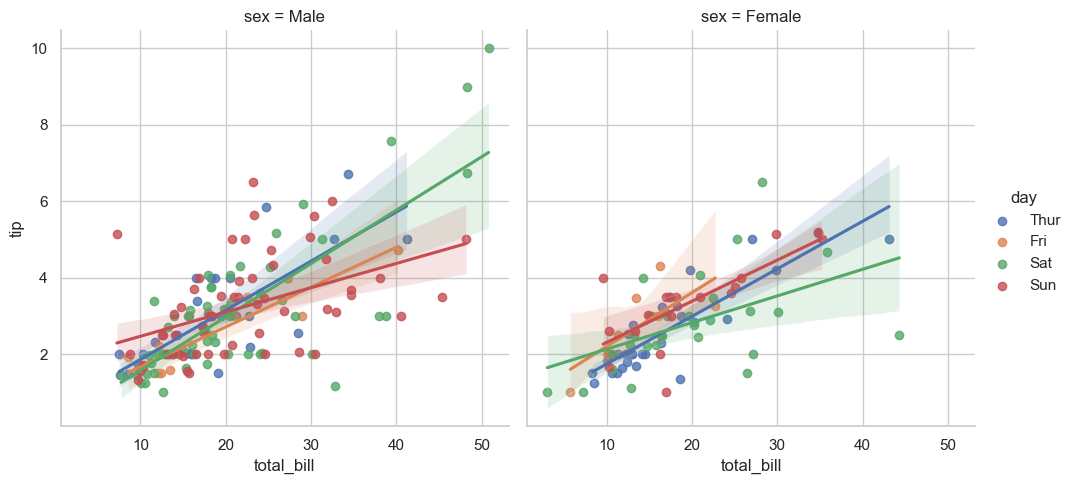

In [212]:
g = sns.lmplot(data=tips,x='total_bill',y='tip',hue='day',col='sex') #hue로 추세선을 나누고 col로 남자 여자 나눴음
#성별별 날짜에 따른 총 요금과 팁의 관계성
#대충 분석 - 목/금에 추세선은 성별에 상관없이 높다.
#일요일의 추세선은 성별에 상관없이 낮다
# 목요일은 여자가 많이왔고 토/일엔 남자가 많이 왔다.
# 토요일의 추세는 남자가 가파르다.
# 따라서 팁을 많이 받고 싶으면 목/금에 일하는게 낫다.
# 일요일은 아무래도 다음날 출근으로 인한 기분 저하로 인해서 팁을 잘 안주나보다

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


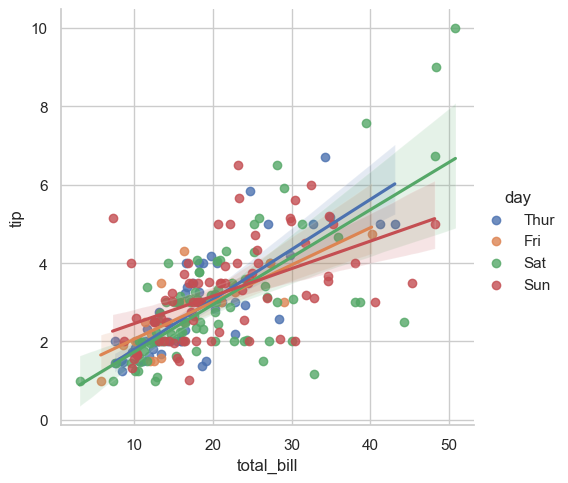

In [213]:
g = sns.lmplot(data=tips,x='total_bill',y='tip',hue='day')

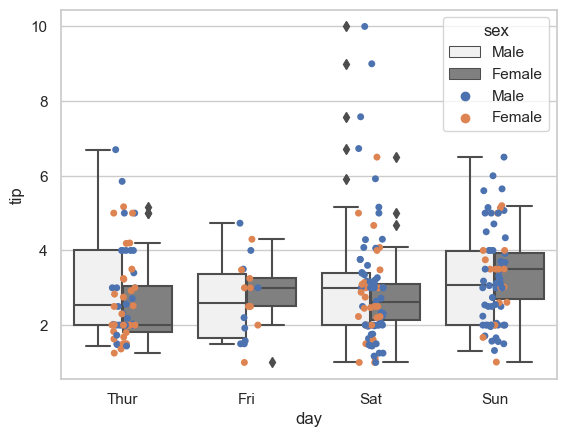

In [214]:
g = sns.boxplot(data=tips,x='day',y='tip',hue='sex',color='gray')
g = sns.stripplot(data=tips,x='day',y='tip',hue='sex')



c:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


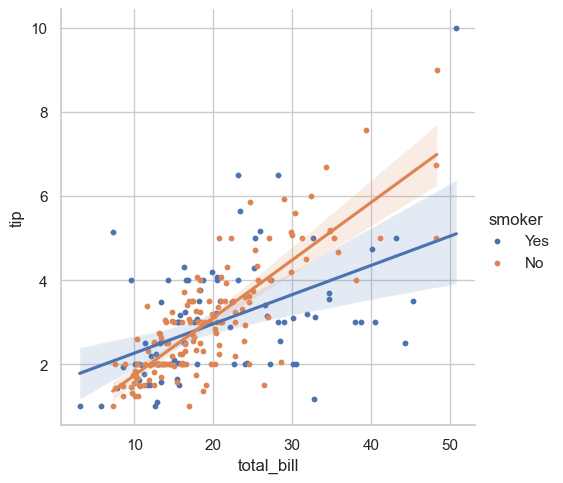

In [215]:
sns.lmplot(data = tips,x = 'total_bill',y = 'tip',scatter_kws={"s":10,"alpha":1},hue="smoker")
#흡연자가 대체적으로 돈을 적게 주는 것을 알 수 있다.

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


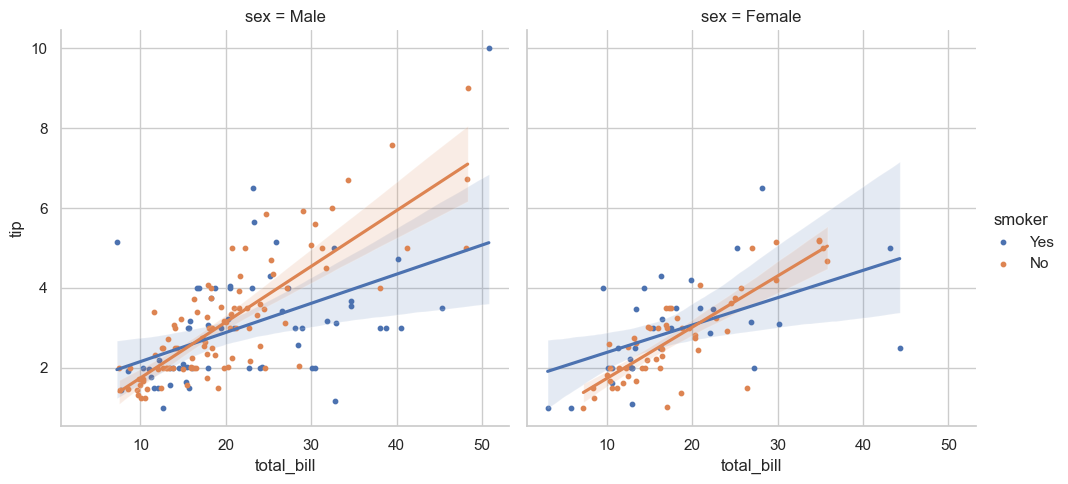

In [216]:
sns.lmplot(data = tips,x = 'total_bill',y = 'tip',scatter_kws={"s":10,"alpha":1},hue="smoker",col="sex")
# 남자와 여자로 구분해도 흡연자가 대체적으로 팁을 적게준다.

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


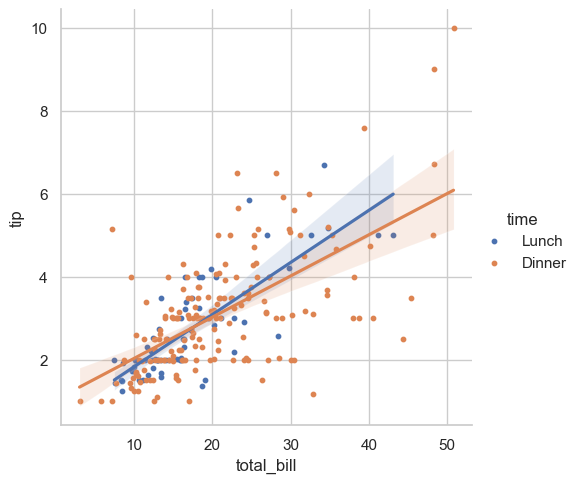

In [217]:
sns.lmplot(data = tips,x = 'total_bill',y = 'tip',scatter_kws={"s":10,"alpha":1},hue="time")
#시간에 따른 팁 차이는 그렇게 크지 않으므로 큰 관련이 없다고 보인다.

In [218]:
#sns.barplot(data=tips,x='total_bill',y='tip')
#total bill이 너무 많아서 빽빽하다. 구간화가 필요하다
max_v = tips['total_bill'].max()
print(max_v)
mean_v = tips['total_bill'].mean()
print(mean_v)
median_v = tips['total_bill'].median()
print(median_v)
min_v = tips['total_bill'].min()
print(min_v)

50.81
19.78594262295082
17.795
3.07


<Axes: xlabel='total_bill_cat', ylabel='tip'>

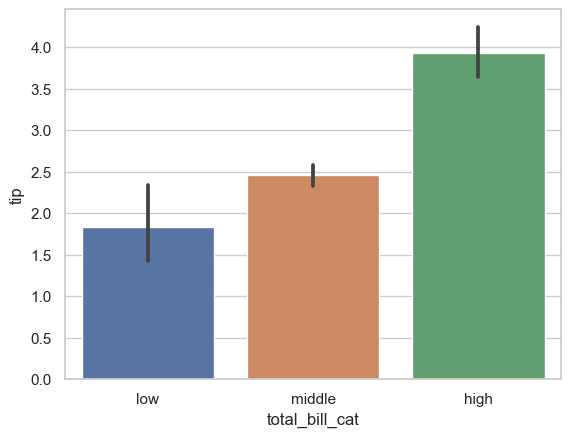

In [220]:
#g1 = 3~10
#g2 = 10~20
#g3 = 20~
tips = tips.sort_values('total_bill') #이렇게 sort할 수 있고, inplace=True를 사용해서 sort할 수 있다.
def check_num(x):
    if x <= 10:
        return 'low'
    elif x <=20:
        return 'middle'
    else:
        return 'high'
#그룹화를 하기 위해서 마스킹을 진행한다.
tips['total_bill_cat'] = tips['total_bill'].apply(lambda x: check_num(x))
#print(tips)
sns.barplot(data = tips, x='total_bill_cat',y='tip')


In [222]:
import plotly.express as px
fig = px.bar(x=tips['total_bill_cat'],y=tips['tip'])
fig.show()

In [225]:
fig = px.scatter(tips, x="total_bill", y="tip", trendline="ols",facet_col='smoker',color='sex')
fig.show()

In [226]:
df = px.data.gapminder()

##### pandas 데이터의 인덱싱(마스킹)
- 주어진 데이터프레임에서 정해진 조건에 따라서 분류할 수 있다.
- 상당히 많이 사용되는 기법이다

In [231]:
m = df['year'] == 2007


In [236]:
df = df[m] #-> year가 2007에 해당하는 것만 리턴한다.
popul = df['pop'] >= 100000000
df = df[popul]
print(df)
contin = df['continent'] == 'Asia'
df = df[contin]
print(df)
df = df.reset_index(drop=True)
print(df)

         country continent  year  lifeExp         pop     gdpPercap iso_alpha  \
107   Bangladesh      Asia  2007   64.062   150448339   1391.253792       BGD   
299        China      Asia  2007   72.961  1318683096   4959.114854       CHN   
707        India      Asia  2007   64.698  1110396331   2452.210407       IND   
719    Indonesia      Asia  2007   70.650   223547000   3540.651564       IDN   
803        Japan      Asia  2007   82.603   127467972  31656.068060       JPN   
1175    Pakistan      Asia  2007   65.483   169270617   2605.947580       PAK   

      iso_num  
107        50  
299       156  
707       356  
719       360  
803       392  
1175      586  
         country continent  year  lifeExp         pop     gdpPercap iso_alpha  \
107   Bangladesh      Asia  2007   64.062   150448339   1391.253792       BGD   
299        China      Asia  2007   72.961  1318683096   4959.114854       CHN   
707        India      Asia  2007   64.698  1110396331   2452.210407       IND

C:\Users\BIG3-09\AppData\Local\Temp\ipykernel_15828\2514752497.py:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



In [237]:
fig2 = px.pie(df,values='pop',names='country') #values = 퍼센트 나눌 값, names = 이름
fig2.show()

- 마스킹을 하다보면 여러가지 조건을 설정해야되는 경우가 있다.
- 이 경우 쿼리함수를 사용한다.

In [238]:
df2 = px.data.gapminder()
df2['year'].unique() #하나 값만 출력하는 것

array([1952, 1957, 1962, 1967, 1972, 1977, 1982, 1987, 1992, 1997, 2002,
       2007], dtype=int64)

In [253]:
#여러 조건을 추가하는 법 : 쿼리 사용
df2.query("1972 <= year <= 1987 and pop >= 10000000",inplace=True) #이런식으로 조건을 던져줄 수 있다. 단, 문자열로 적어줘야한다. 여러번 마스킹을 하기보다 더 간단하다.
print(df2)
df3 = px.data.gapminder()
df3.query("year == 2007 and continent == 'Europe'",inplace=True) #또한 쿼리를 작성할 때 따옴표 주의하자, 따옴표가 붙어있을 때 다른 따옴표여야한다.
df3.loc[df3['pop']<10000000,'country'] = "Other countries" #마스킹하고 변환
fig = px.pie(df3,names='country',values='pop',title="2007 유럽 인구")
fig.show()


          country continent  year  lifeExp       pop    gdpPercap iso_alpha  \
4     Afghanistan      Asia  1972   36.088  13079460   739.981106       AFG   
5     Afghanistan      Asia  1977   38.438  14880372   786.113360       AFG   
6     Afghanistan      Asia  1982   39.854  12881816   978.011439       AFG   
7     Afghanistan      Asia  1987   40.822  13867957   852.395945       AFG   
28        Algeria    Africa  1972   54.518  14760787  4182.663766       DZA   
...           ...       ...   ...      ...       ...          ...       ...   
1648      Vietnam      Asia  1972   50.254  44655014   699.501644       VNM   
1649      Vietnam      Asia  1977   55.764  50533506   713.537120       VNM   
1650      Vietnam      Asia  1982   58.816  56142181   707.235786       VNM   
1651      Vietnam      Asia  1987   62.820  62826491   820.799445       VNM   
1675  Yemen, Rep.      Asia  1987   52.922  11219340  1971.741538       YEM   

      iso_num  
4           4  
5           4  
6  

- 자료 덮어쓰지말자
1. 첫번째 위의 코드를 수정해야할 때 처음부터 다시 실행해야함
2. 편집 전의 값을 조회해야할 때 다시 실행해야한다.
3. 따라서 확실하지 않으면 덮어쓰지 않도록 하자.

In [266]:
test = df3.query("country == 'Other countries'").sort_values(['gdpPercap'],ascending=True)
print(test.iloc[0]['gdpPercap']) #인구수가 1000만 보다 작고 gdp가 가장 낮은 나라의 gdp

5937.029525999998
